In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
from scipy.stats import linregress
sns.set()

## Gait Data 

'PD is a chronic and progressive neurological disorder that results in tremor, rigidity, slowness, and postural instability. A disturbed gait is a common, debilitating symptom; patients with severe gait disturbances are prone to falls and may lose their functional independence.'

Data records constant speed subjects had for 2 mins 

In [2]:
df=pd.read_excel(r"C:\Users\Bio Guest\Documents\Datasets\demographics.xls")

In [3]:
df

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SiCo26,Si,CO,26,male,60,1.74,72.0,NaN,NaN,NaN,9.20,1.000,NaN
162,SiCo27,Si,CO,27,male,67,1.90,95.0,NaN,NaN,NaN,12.52,1.120,NaN
163,SiCo28,Si,CO,28,male,61,1.70,72.0,NaN,NaN,NaN,12.65,0.990,NaN
164,SiCo29,Si,CO,29,male,53,1.70,87.0,NaN,NaN,NaN,11.41,1.290,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                166 non-null    object 
 1   Study             166 non-null    object 
 2   Group             166 non-null    object 
 3   Subjnum           166 non-null    int64  
 4   Gender            166 non-null    object 
 5   Age               166 non-null    int64  
 6   Height (meters)   163 non-null    float64
 7   Weight (kg)       163 non-null    float64
 8   HoehnYahr         111 non-null    float64
 9   UPDRS             135 non-null    float64
 10  UPDRSM            135 non-null    float64
 11  TUAG              153 non-null    float64
 12  Speed_01 (m/sec)  165 non-null    float64
 13  Speed_10          20 non-null     float64
dtypes: float64(8), int64(2), object(4)
memory usage: 18.3+ KB


In [5]:
df.describe()

,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
count,166.000000,166.000000,163.000000,163.000000,111.000000,135.000000,135.000000,153.000000,165.000000,20.000000
mean,16.469880,65.138554,57.634233,72.558282,1.891892,21.466667,13.177778,10.918235,1.125345,0.967450
std,9.549663,9.200070,78.790179,12.095861,0.892915,17.571942,10.871616,3.476727,0.213814,0.307002
min,1.000000,36.000000,1.450000,47.000000,0.000000,0.000000,0.000000,6.230000,0.360000,0.228000
25%,8.250000,59.000000,1.655000,64.000000,2.000000,1.000000,1.000000,8.940000,1.013000,0.793000
50%,16.000000,65.000000,1.740000,72.000000,2.000000,24.000000,14.000000,10.320000,1.144000,0.955000
75%,23.750000,71.000000,160.000000,80.000000,2.500000,33.000000,21.000000,11.990000,1.261000,1.189000
max,40.000000,86.000000,185.000000,105.000000,3.000000,70.000000,44.000000,36.340000,1.542000,1.532000


#### HoehnYahr
Scale used for the staging of the functional disability associated with PD. Describes the progress through various stages (measure of severity: 1-5 (5= wheelchair or bedrideen), 0= no sign of disease)

#### UPDRS 
Rating tool used to gauge the the severity and progression of PD in patients. Higher scores show increased severity. Consistent with HoehnYahr staging system. 

#### TUAG
Reliable measure of functional performance that captures transfers, gait, and turning movements. Score = time to complete the  task

#### Study: indicate the study from which the data originated:
Ga - Galit Yogev et al (dual tasking in PD; Eur J Neuro, 2005)

Ju – Hausdorff et al (RAS in PD; Eur J Neuro, 2007), rhythmic auditory simulation 

Si - Silvi Frenkel-Toledo et al (Treadmill walking in PD; Mov Disorders,2005)

In [6]:
df.drop(['Speed_10','ID'], axis=1, inplace=True) #irrelevant and too many missing values (missing = doesn't exist) 

In [7]:
df.rename(columns = {'Height (meters)':'Height', 'Weight (kg)':'Weight','Speed_01 (m/sec)':'Speed'}, inplace = True)
# height=m, weight=kg, speed=m/sec

In [8]:
df['Height'] = df['Height'].apply(lambda x: (x/100) if (x >=100) else x)
# replace incorrect data (height>100)

In [9]:
# remove any outliers (not required as minimum height and weight is reasonable)
# df = df.loc[(df["Height"] >= df["Height"].quantile(0.025))
#             & (df["Height"] <= df["Height"].quantile(0.975)) 
#             & (df["Weight"] >= df["Weight"].quantile(0.025)) 
#             & (df["Weight"] <= df["Weight"].quantile(0.975))]

In [10]:
df.loc[(df['Height'].isnull())|(df['Weight'].isnull())]

,Study,Group,Subjnum,Gender,Age,Height,Weight,HoehnYahr,UPDRS,UPDRSM,TUAG,Speed
1,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642
10,Ga,PD,15,male,81,NaN,80.0,2.0,33.0,20.0,10.32,0.948
14,Ga,PD,19,female,76,NaN,55.0,2.0,30.0,22.0,13.20,1.124
16,Ga,PD,21,male,80,NaN,63.0,3.0,46.0,27.0,14.06,1.166
18,Ga,PD,23,female,71,1.60,NaN,3.0,51.0,25.0,25.01,0.360
152,Si,CO,17,female,64,1.65,NaN,NaN,NaN,NaN,10.44,1.202


In [11]:
# mean age of men and women  
df.loc[(df.Gender=='female')].Age.mean()
# mean age for both genders ~ 65 

64.47058823529412

In [12]:
# take average height of men and women  (age>64) 
wh=df.loc[(df.Gender=='female')&(df.Age >64)].Height.mean()
mh=df.loc[(df.Gender=='male')&(df.Age >64)].Height.mean()

In [13]:
# take average weight of men and women (age>64)
ww=df.loc[(df.Gender=='female')&(df.Age >64)].Weight.mean()
mw=df.loc[(df.Gender=='male')&(df.Age >64)].Weight.mean()  

In [14]:
# replace NaN female height with wh 
df.loc[(df.Gender=='female'), 'Height']=df.loc[(df.Gender=='female'), 'Height'].fillna(wh)

In [15]:
# replace NaN male height with mh 
df.loc[(df.Gender=='male'), 'Height']=df.loc[(df.Gender=='male'), 'Height'].fillna(mh)

In [16]:
# replace NaN male & female weight with mw & ww
df.loc[(df.Gender=='female'), 'Weight']=df.loc[(df.Gender=='female'), 'Weight'].fillna(ww)
df.loc[(df.Gender=='male'), 'Weight']=df.loc[(df.Gender=='male'), 'Weight'].fillna(mw)

In [17]:
df.Group.value_counts() #73 subjects are healthy 

PD    93
CO    73
Name: Group, dtype: int64

In [18]:
df.loc[(df.Group=='CO')&((df.UPDRS.isnull())|(df.TUAG.isnull())|(df.HoehnYahr.isnull()))].shape
# 63 subjects have atleast one missing PD related measure- dependent on the study done  

(63, 12)

In [19]:
df.loc[(df.Group=='PD')&((df.UPDRS.isnull())|(df.TUAG.isnull())|(df.HoehnYahr.isnull()))] # 4/93 PD patients have missing records

,Study,Group,Subjnum,Gender,Age,Height,Weight,HoehnYahr,UPDRS,UPDRSM,TUAG,Speed
9,Ga,PD,14,male,56,1.95,105.0,2.0,29.0,19.0,NaN,1.369
17,Ga,PD,22,male,78,1.78,65.0,2.0,49.0,29.0,NaN,0.802
58,Si,PD,2,female,77,1.58,67.0,2.5,NaN,NaN,NaN,0.770
61,Si,PD,7,female,54,1.66,65.0,2.0,NaN,NaN,10.99,1.088


In [20]:
df.groupby(['Study','Group']).apply(lambda df: df.loc[df['Speed'].idxmax()]) # max speed in each group and study 

Study Group  Subjnum  Gender  Age  Height  Weight  HoehnYahr  \
Study Group                                                                
Ga    CO       Ga    CO       22    male   65    1.72    72.0        0.0   
      PD       Ga    PD       27    male   72    1.80    95.0        2.0   
Ju    CO       Ju    CO       17  female   65    1.70    60.0        NaN   
      PD       Ju    PD       23    male   68    1.60    69.0        2.0   
Si    CO       Si    CO       12  female   37    1.61    54.0        NaN   
      PD       Si    PD       34    male   71    1.80    68.0        2.0   

             UPDRS  UPDRSM   TUAG  Speed  
Study Group                               
Ga    CO       0.0     0.0    NaN  1.542  
      PD      21.0    10.0   7.88  1.423  
Ju    CO       0.0     0.0   7.06  1.540  
      PD      19.0    16.0   7.53  1.247  
Si    CO       NaN     NaN   6.23  1.538  
      PD      37.0    22.0  11.63  1.386

In [21]:
da=df.loc[df.Group=='PD']
db=df.loc[df.Group=='CO']

In [22]:
# renumbering subjnum for different studies in PD group so they are consecutive 
sip = (da.Study=='Si')
da.loc[sip,'Subjnum']=range(5, 5+len(da.loc[sip]))
gap = (da.Study=='Ga')
da.loc[gap,'Subjnum']=range(5,5+len(da.loc[gap]))
# CO group 
sic = (db.Study=='Si')
db.loc[sic,'Subjnum']=range(2,2+len(db.loc[sic]))
gac = (db.Study=='Ga')
db.loc[gac,'Subjnum']=range(1,1+len(db.loc[gac]))

C:\Users\Bio Guest\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
#print(da.to_string())

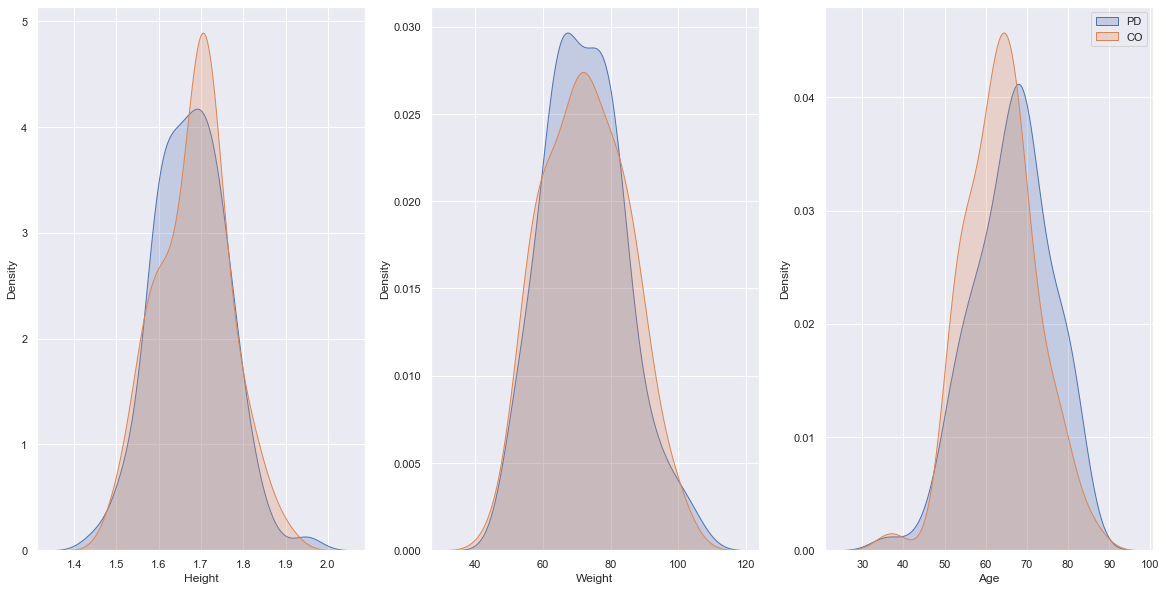

In [24]:
# Distribution of age, height and weight of both groups to check for fair comparison 
fig, axes = plt.subplots(1, 3,figsize=(20,10))
sns.kdeplot(data=da['Height'], shade=True, label='PD',ax=axes[0])
sns.kdeplot(data=db['Height'], shade=True, label='CO',ax=axes[0])
sns.kdeplot(data=da['Weight'], shade=True, label='PD',ax=axes[1])
sns.kdeplot(data=db['Weight'], shade=True, label='CO',ax=axes[1])
sns.kdeplot(data=da['Age'], shade=True, label='PD',ax=axes[2])
sns.kdeplot(data=db['Age'], shade=True, label='CO',ax=axes[2])
plt.legend()

Distribution of subject weight, height, and age is shown to be ~ uniform in both groups. Non-unifrom distribution can give biased results. 

In [25]:
da.Gender.value_counts() #PD gender demographic count 

male      58
female    35
Name: Gender, dtype: int64

In [44]:
db.Gender.value_counts() #CO gender demographic count 

male      40
female    33
Name: Gender, dtype: int64

[Text(0.5, 1.0, 'Gender vs Speed - CO')]

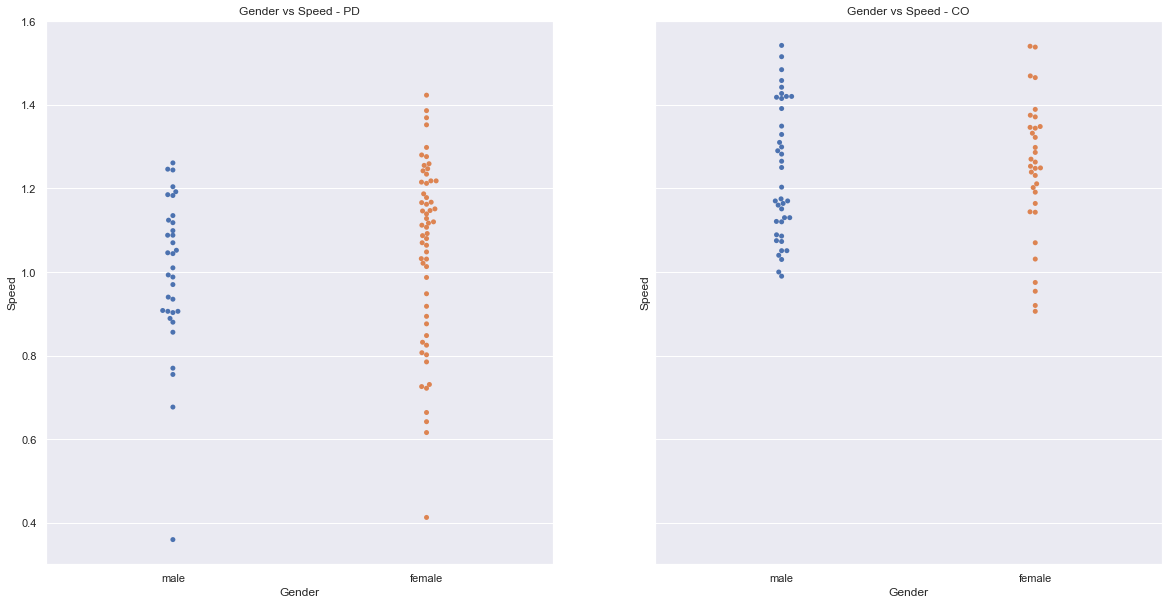

In [29]:
# Does Gender affect speed 
fig, axes = plt.subplots(1, 2, sharey=True,sharex=True ,figsize=(20,10))
sns.swarmplot(x=da['Gender'],y=da['Speed'],ax=axes[0]).set(title="Gender vs Speed - PD")
sns.swarmplot(x=db['Gender'],y=db['Speed'],ax=axes[1]).set(title="Gender vs Speed - CO")

Control group shows similar range of speed for both genders. PD group shows a wider range with some outliers. PD group also shows majority females have higher speeds - could be affected by age & proportion of subjects that are either gender.

In [30]:
matrix=da.corr().round(1)
matrix2=db.corr().round(1)

<AxesSubplot:>

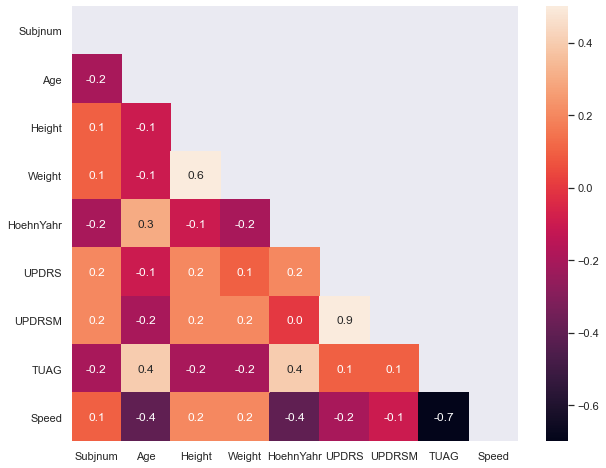

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix,annot=True,vmax=0.5, mask=np.triu(da.corr()), fmt=".1f")
# sns.heatmap(matrix2,annot=True, vmax=0.4, mask=np.triu(db.corr()), fmt=".1f")

0.3-0.5 = possible correlation

0.6-0.9 = good correlation

0.2 = not good, changing one variable may not change the other 

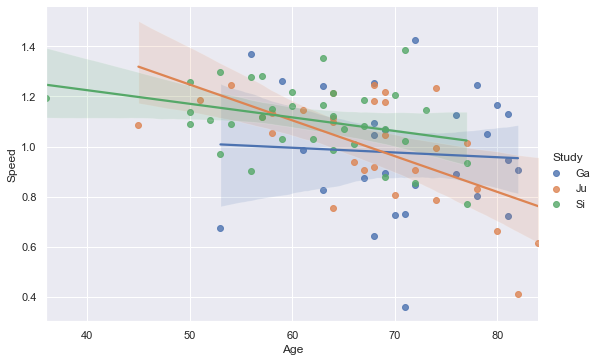

In [32]:
# How Age affects speed in different studies 
sns.lmplot(x='Age',y='Speed',hue='Study',data=da, height=5, aspect=1.5)

Increasing age generally leads to a decrease in walking speed. However, the strength of this correlation differs by the type of study done i.e, Galit Yogev et al study shows the weakest correlation between age and speed (more subjects can clarify this relationship). 

<AxesSubplot:xlabel='TUAG', ylabel='Speed'>

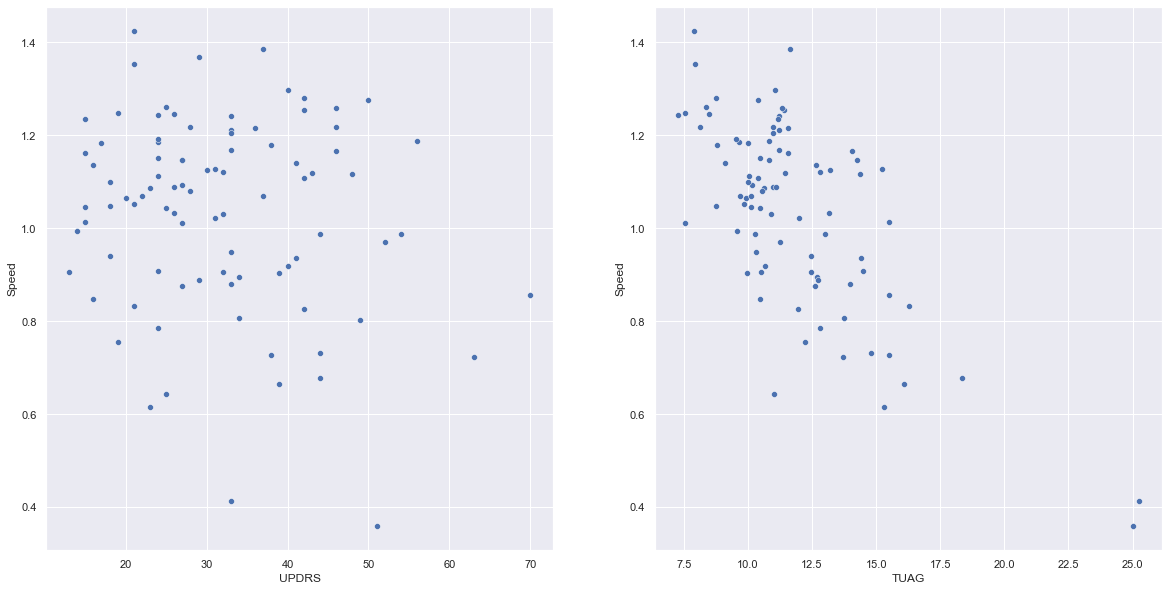

In [33]:
fig, axes = plt.subplots(1, 2,figsize=(20,10))
sns.scatterplot(x='UPDRS',y='Speed',data=da,ax=axes[0])
sns.scatterplot(x='TUAG',y='Speed',data=da,ax=axes[1])

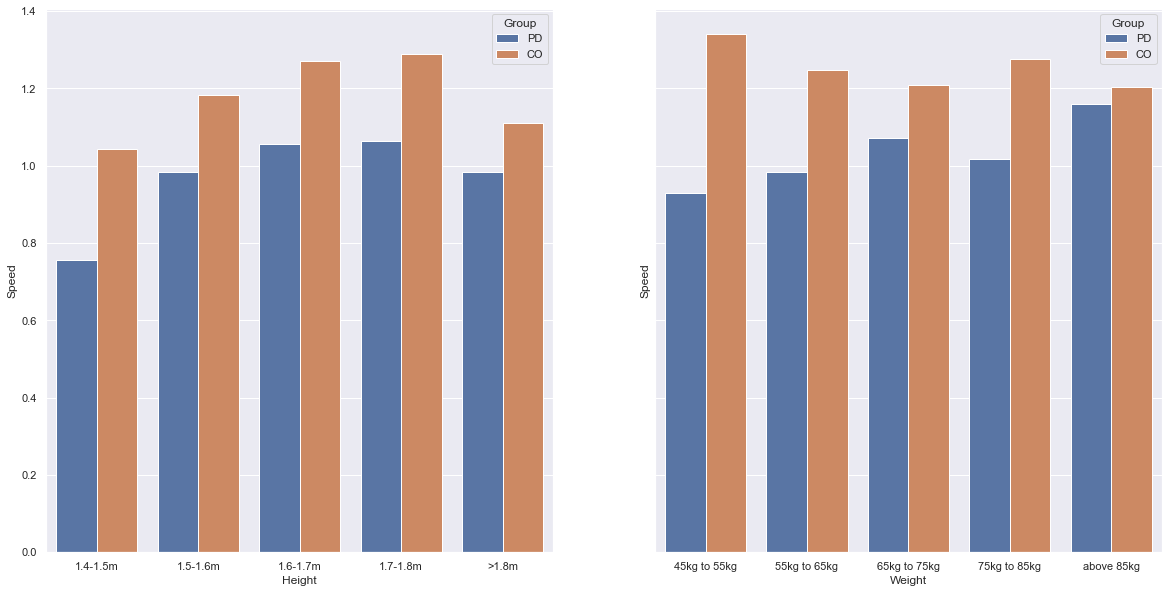

In [34]:
weight_bin=pd.cut(df['Weight'], bins=[45,55,65,75,85,df['Weight'].max()])
height_bin=pd.cut(df['Height'], bins=[1.4,1.5,1.6,1.7,1.8,df['Height'].max()])
fig, axes = plt.subplots(1, 2, sharey='row',figsize=(20,10))
sns.set_theme()
sns.barplot(x=height_bin, y=df['Speed'], hue= df['Group'],ci=None,ax=axes[0]).set(xlabel="Height",ylabel="Speed")
sns.barplot(x=weight_bin, y=df['Speed'], hue= df['Group'],ci=None,ax=axes[1]).set(xlabel="Weight",ylabel="Speed")
plt.setp(axes, xticks=[0,1,2,3,4], xticklabels=['45kg to 55kg', '55kg to 65kg', '65kg to 75kg','75kg to 85kg','above 85kg'])
# change height xtick labels 
plt.sca(axes[0])
plt.xticks(range(5), ['1.4-1.5m', '1.5-1.6m', '1.6-1.7m','1.7-1.8m','>1.8m'])
plt.show()

In [35]:
# saving CO and PD group as a file to access in other notebooks 
da.to_csv('PD_data.csv')
db.to_csv('CO_data.csv')

## Voice Data 

'Parkinson's is a neurological disorder which leads to the presence of trermors and stiffness, a highlighted indicator is its effect on the patient's speech. Dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range) are all symptoms of Parkinson's.' 

In [36]:
dx=pd.read_csv(r"C:\Users\Bio Guest\Documents\Datasets\PD_voice.csv")

In [37]:
dx.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [38]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [39]:
dx.describe()
#23/31 PD patients 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [40]:
# cor_matrix = dx.corr().abs()
# upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.67)]
# dxx = dx.drop(dx[to_drop], axis=1)
# dxx

#returns 8 columns (1 extra column deleted)

In [41]:
dx_corr = dx.corr()

# Find highly correlated features and drop them
highly_correlated_features = set()

for column in range(0, len(dx_corr)):
    if column == 'status':
        continue
    column_name = dx_corr.columns[column]
    for row in range(0,len(dx_corr.index)):
        row_name = dx_corr.index[row]
        if row_name == column_name:
            continue
        corr_value = dx_corr.iloc[column][row]
        if corr_value > 0.67:
            highly_correlated_features.add(row_name)
print(highly_correlated_features)
dx = dx.drop(highly_correlated_features, axis= 1)


#returns 9 columns (including HNR)

{'Jitter:DDP', 'MDVP:Shimmer', 'Shimmer:APQ3', 'MDVP:RAP', 'MDVP:Jitter(Abs)', 'NHR', 'PPE', 'spread1', 'MDVP:Jitter(%)', 'MDVP:Shimmer(dB)', 'MDVP:APQ', 'Shimmer:DDA', 'Shimmer:APQ5', 'MDVP:PPQ'}


### Column headers 

#### name
ASCII subject name and recording number 

#### MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz)
Average vocal fundamental frequency, Maximum vocal fundamental frequency, Minimum vocal fundamental frequency 

#### HNR 
Ratio of noise to tonal components in the voice

#### RPDE, D2 
Two nonlinear dynamical complexity measures 

#### DFA
Signal fractal scaling exponent 

#### spread2
Nonlinear measures of fundamental frequency variation 

In [42]:
dx.rename(columns = {'MDVP:Fo(Hz)':'av_freq', 'MDVP:Fhi(Hz)':'max_freq','MDVP:Flo(Hz)':'min_freq'}, inplace = True)

In [43]:
dx

,name,av_freq,max_freq,min_freq,HNR,status,RPDE,DFA,spread2,D2
0,phon_R01_S01_1,119.992,157.302,74.997,21.033,1,0.414783,0.815285,0.266482,2.301442
1,phon_R01_S01_2,122.400,148.650,113.819,19.085,1,0.458359,0.819521,0.335590,2.486855
2,phon_R01_S01_3,116.682,131.111,111.555,20.651,1,0.429895,0.825288,0.311173,2.342259
3,phon_R01_S01_4,116.676,137.871,111.366,20.644,1,0.434969,0.819235,0.334147,2.405554
4,phon_R01_S01_5,116.014,141.781,110.655,19.649,1,0.417356,0.823484,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,19.517,0,0.448439,0.657899,0.121952,2.657476
191,phon_R01_S50_3,209.516,253.017,89.488,19.147,0,0.431674,0.683244,0.129303,2.784312
192,phon_R01_S50_4,174.688,240.005,74.287,17.883,0,0.407567,0.655683,0.158453,2.679772
193,phon_R01_S50_5,198.764,396.961,74.904,19.020,0,0.451221,0.643956,0.207454,2.138608
